# Perceptron: Online Recursion

## Introduction

In this notebook, we'll explore the online recursion method for training a perceptron. This method is a form of stochastic optimization that updates the model parameters incrementally as it processes each data point.

## The Perceptron Model

Recall that the perceptron model for binary classification is defined as:

$$y(\mathbf{x}) = \text{sign}(\mathbf{w}^T\mathbf{x} + b)$$

where $\mathbf{w}$ is the weight vector, $b$ is the bias, and $\mathbf{x}$ is the input feature vector.

## Regularized Perceptron Risk

We start with a regularized version of the perceptron risk function:

$$J(\mathbf{w}, b) = \rho\|\mathbf{w}\|^2 + \frac{1}{N}\sum_{n=1}^N \max\{0, -t_n(\mathbf{w}^T\mathbf{x}_n + b)\}$$

where:
- $\rho$ is the regularization parameter
- $t_n \in \{-1, +1\}$ is the target class for the $n$-th sample
- $N$ is the total number of samples

## Online Recursion Algorithm

The online recursion algorithm for the perceptron can be described as follows:

1. Initialize $\mathbf{w}$ and $b$
2. For each iteration:

   a. Select or receive a sample $(\mathbf{x}_n, t_n)$

   b. Compute the prediction: $\hat{y}_n = \mathbf{w}^T\mathbf{x}_n + b$
   
   c. Update the parameters if misclassified:
      If $t_n\hat{y}_n \leq 0$:
      - $b \leftarrow b + \mu t_n$
      - $\mathbf{w} \leftarrow (1-2\mu\rho)\mathbf{w} + \mu t_n\mathbf{x}_n$

Here, $\mu$ is the learning rate.

## Simplified Notation

We can simplify the notation by extending the feature and weight vectors:

$$\mathbf{x} = \begin{bmatrix} 1 \\ \mathbf{x} \end{bmatrix}, \quad \mathbf{w} = \begin{bmatrix} b \\ \mathbf{w} \end{bmatrix}$$

This allows us to write the update rule more compactly:

$$\begin{cases}
\hat{y}_n = \mathbf{x}_n^T\mathbf{w}_{n-1} \\
\mathbf{w}_n = A\mathbf{w}_{n-1} + \mu t_n\mathbf{x}_n I[t_n\hat{y}_n \leq 0]
\end{cases}$$

where $I[\cdot]$ is the indicator function, and $A$ is a diagonal matrix:

$$A = \begin{bmatrix} 1 & 0 \\ 0 & (1-2\mu\rho)I_M \end{bmatrix}$$

## Mini-batch Version

For a mini-batch of size $B$, the update becomes:

$$\begin{cases}
\text{Select } B \text{ samples } \{(t_b, \mathbf{x}_b)\} \text{ at random} \\
\hat{y}_b = \mathbf{x}_b^T\mathbf{w}_{n-1}, \quad b = 0, 1, \ldots, B-1 \\
\mathbf{w}_n = A\mathbf{w}_{n-1} + \mu \left(\frac{1}{B}\sum_{b=0}^{B-1} t_b\mathbf{x}_b I[t_b\hat{y}_b \leq 0]\right)
\end{cases}$$

## Classical Perceptron Update

In the absence of regularization ($\rho = 0$), we get the classical perceptron update:

$$\mathbf{w}_n = \mathbf{w}_{n-1} + \mu t_n\mathbf{x}_n I[t_n\hat{y}_n \leq 0]$$

Often, $\mu$ is set to 1, simplifying the update to:

$$\mathbf{w}_n = \mathbf{w}_{n-1} + t_n\mathbf{x}_n, \quad \text{if } t_n\hat{y}_n \leq 0$$

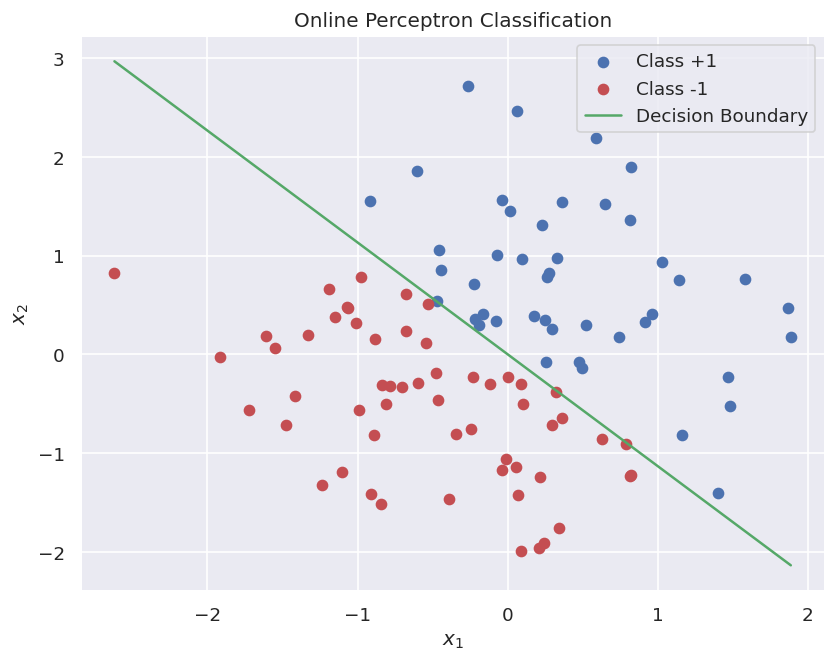

In [4]:
## Implementation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

sbn.set_theme()

class OnlinePerceptron:
    def __init__(self, input_dim, learning_rate=1.0, regularization=0.0):
        self.w = np.zeros(input_dim + 1)  # +1 for bias
        self.learning_rate = learning_rate
        self.regularization = regularization
    
    def predict(self, X):
        X_extended = np.hstack([np.ones((X.shape[0], 1)), X])
        return np.sign(np.dot(X_extended, self.w))
    
    def update(self, x, t):
        x_extended = np.hstack([1, x])
        y_hat = np.dot(x_extended, self.w)
        if t * y_hat <= 0:
            self.w[1:] = (1 - 2 * self.learning_rate * self.regularization) * self.w[1:]
            self.w += self.learning_rate * t * x_extended

    def train(self, X, t, epochs=1):
        for _ in range(epochs):
            for x_i, t_i in zip(X, t):
                self.update(x_i, t_i)

# Generate some linearly separable data
np.random.seed(42)
X = np.random.randn(100, 2)
t = np.sign(X[:, 0] + X[:, 1])

# Train the perceptron
perceptron = OnlinePerceptron(input_dim=2)
perceptron.train(X, t, epochs=5)

plt.figure(figsize=(8, 6), dpi=120)

# Visualize the results
plt.scatter(X[t==1][:, 0], X[t==1][:, 1], c='b', label='Class +1')
plt.scatter(X[t==-1][:, 0], X[t==-1][:, 1], c='r', label='Class -1')

# Plot decision boundary
x_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_range = -(perceptron.w[1] * x_range + perceptron.w[0]) / perceptron.w[2]
plt.plot(x_range, y_range, 'g-', label='Decision Boundary')

plt.legend()
plt.title('Online Perceptron Classification')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.show()

## Conclusion

The online recursion method for the perceptron provides an efficient way to train the model incrementally. It's particularly useful for large datasets or streaming data scenarios where we don't have access to the entire dataset at once. The algorithm updates the model parameters after each sample, making it adaptable to changing patterns in the data.